<a href="https://colab.research.google.com/github/carolinanami-max/Ironhack-AI-student-day-1-lab-1/blob/Ironhack-Lab-Submission/AC_W1_Lab_02_01_BreastCancer_Prediction_CarolinaNami.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
Breast Cancer Prediction with KNN
Author: [Your Name]
Description: Predict whether a breast tumor is malignant or benign using KNN
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

# Load the breast cancer dataset
print("Loading breast cancer dataset...")
cancer_data = load_breast_cancer()

# The dataset is a Bunch object with 'data', 'target', 'feature_names', etc.
print(f"\nDataset type: {type(cancer_data)}")
print(f"Number of samples: {len(cancer_data.data)}")
print(f"Number of features: {len(cancer_data.feature_names)}")
print(f"Target classes: {cancer_data.target_names}")

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
df['target'] = cancer_data.target

print("\nFirst few rows:")
print(df.head())

print("\nDataset info:")
print(df.info())

print("\nTarget distribution:")
print(df['target'].value_counts())
print(f"Malignant (1): {(df['target'] == 1).sum()}")
print(f"Benign (0): {(df['target'] == 0).sum()}")


Loading breast cancer dataset...

Dataset type: <class 'sklearn.utils._bunch.Bunch'>
Number of samples: 569
Number of features: 30
Target classes: ['malignant' 'benign']

First few rows:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520


BASIC STATISTICS
       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.0

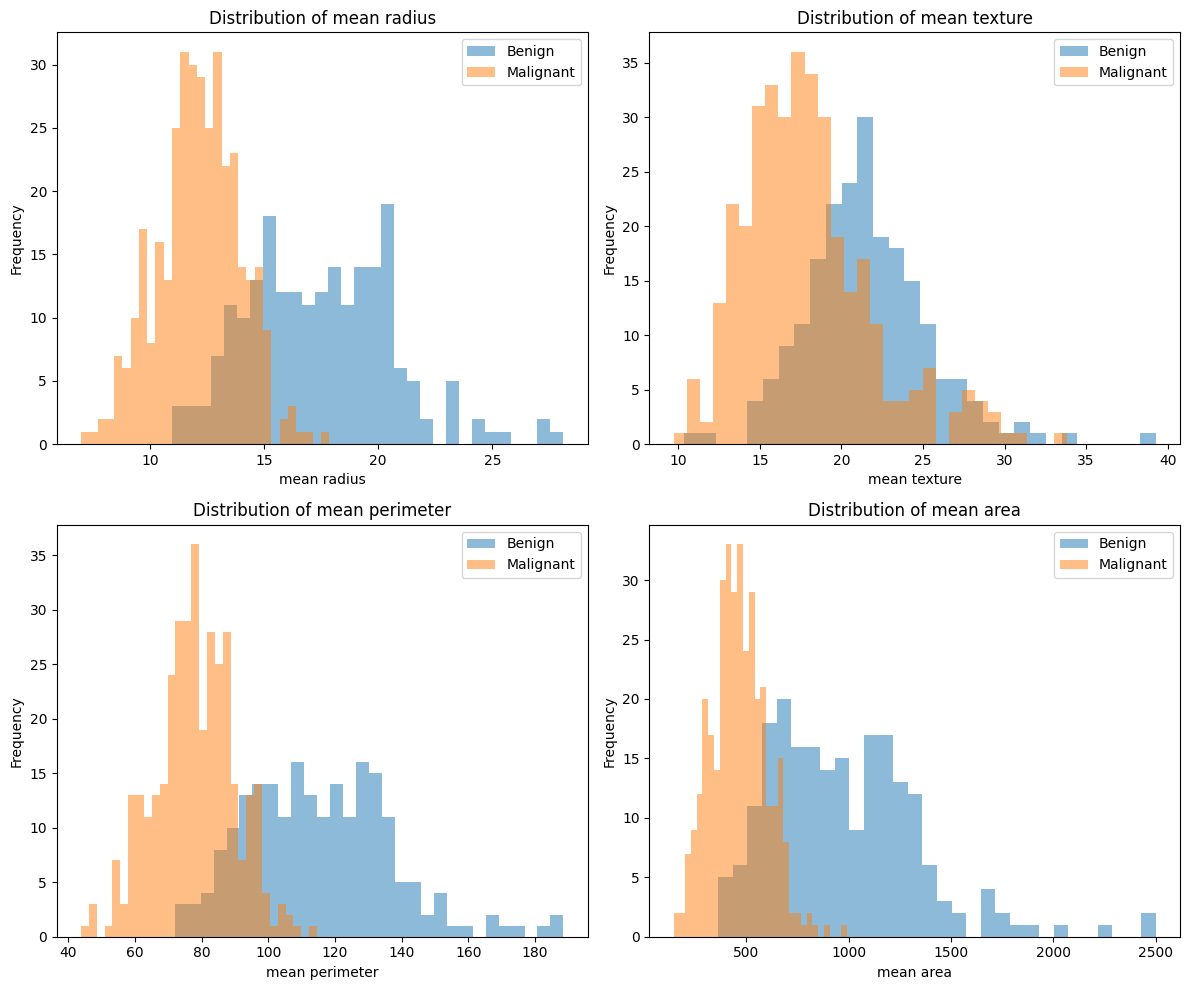

In [ ]:
# Basic statistics
print("\n" + "="*50)
print("BASIC STATISTICS")
print("="*50)
print(df.describe())

# Check for missing values
print("\n" + "="*50)
print("MISSING VALUES")
print("="*50)
missing = df.isnull().sum()
if missing.sum() == 0:
    print("✓ No missing values found!")
else:
    print(missing[missing > 0])

# Visualize feature distributions (select a few key features)
print("\n" + "="*50)
print("FEATURE DISTRIBUTIONS")
print("="*50)

# Select a few representative features to visualize
key_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for idx, feature in enumerate(key_features):
    axes[idx].hist(df[df['target'] == 0][feature], alpha=0.5, label='Benign', bins=30)
    axes[idx].hist(df[df['target'] == 1][feature], alpha=0.5, label='Malignant', bins=30)
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Frequency')
    axes[idx].set_title(f'Distribution of {feature}')
    axes[idx].legend()

plt.tight_layout()
plt.savefig('feature_distributions.png', dpi=150, bbox_inches='tight')
print("Saved visualization to 'feature_distributions.png'")
plt.show()


In [ ]:
# Separate features and target
X = df.drop('target', axis=1)  # All columns except 'target'
y = df['target']  # Target column

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Split into training and testing sets
# random_state ensures reproducibility
# stratify=y ensures both sets have similar class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("\n" + "="*50)
print("DATA SPLIT")
print("="*50)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"Training features: {X_train.shape[1]}")
print(f"Test features: {X_test.shape[1]}")

# Verify class distribution in both sets
print("\nTraining set target distribution:")
print(y_train.value_counts())
print(f"  Benign (0): {(y_train == 0).sum()} ({(y_train == 0).mean()*100:.1f}%)")
print(f"  Malignant (1): {(y_train == 1).sum()} ({(y_train == 1).mean()*100:.1f}%)")

print("\nTest set target distribution:")
print(y_test.value_counts())
print(f"  Benign (0): {(y_test == 0).sum()} ({(y_test == 0).mean()*100:.1f}%)")
print(f"  Malignant (1): {(y_test == 1).sum()} ({(y_test == 1).mean()*100:.1f}%)")


Features shape: (569, 30)
Target shape: (569,)

DATA SPLIT
Training set size: 455 samples
Test set size: 114 samples
Training features: 30
Test features: 30

Training set target distribution:
target
1    285
0    170
Name: count, dtype: int64
  Benign (0): 170 (37.4%)
  Malignant (1): 285 (62.6%)

Test set target distribution:
target
1    72
0    42
Name: count, dtype: int64
  Benign (0): 42 (36.8%)
  Malignant (1): 72 (63.2%)


In [ ]:
# Create KNN classifier
# n_neighbors=5 means the model will look at the 5 nearest neighbors to make a prediction

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

print("KNN classifier trained successfully!")
print(f"Number of neighbors (k): {knn.n_neighbors}")

# Make predictions
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

print(f"\nTraining predictions: {len(y_train_pred)}")
print(f"Test predictions: {len(y_test_pred)}")


KNN classifier trained successfully!
Number of neighbors (k): 5

Training predictions: 455
Test predictions: 114


In [ ]:

# Calculate metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_confusion = confusion_matrix(y_test, y_test_pred)

print("=== Model Performance ===")
print(f"\nTraining Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"\nTest Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")

print("\n=== Confusion Matrix ===")
print("                Predicted")
print("              Benign  Malignant")
print(f"Actual Benign    {test_confusion[0,0]:4d}      {test_confusion[0,1]:4d}")
print(f"      Malignant  {test_confusion[1,0]:4d}      {test_confusion[1,1]:4d}")

print("\n=== Classification Report ===")
print(classification_report(y_test, y_test_pred, target_names=cancer_data.target_names))


=== Model Performance ===

Training Accuracy: 0.9473 (94.73%)
Test Accuracy: 0.9123 (91.23%)

Test Precision: 0.9429
Test Recall: 0.9167

=== Confusion Matrix ===
                Predicted
              Benign  Malignant
Actual Benign      38         4
      Malignant     6        66

=== Classification Report ===
              precision    recall  f1-score   support

   malignant       0.86      0.90      0.88        42
      benign       0.94      0.92      0.93        72

    accuracy                           0.91       114
   macro avg       0.90      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114




EXPERIMENTING WITH DIFFERENT K VALUES
K= 1: Accuracy=0.9211, Precision=0.9565, Recall=0.9167
K= 3: Accuracy=0.9298, Precision=0.9444, Recall=0.9444
K= 5: Accuracy=0.9123, Precision=0.9429, Recall=0.9167
K= 7: Accuracy=0.9298, Precision=0.9444, Recall=0.9444
K= 9: Accuracy=0.9386, Precision=0.9452, Recall=0.9583
K=11: Accuracy=0.9386, Precision=0.9452, Recall=0.9583

Best K value: 9 (Accuracy: 0.9386)

Saved visualization to 'knn_k_comparison.png'


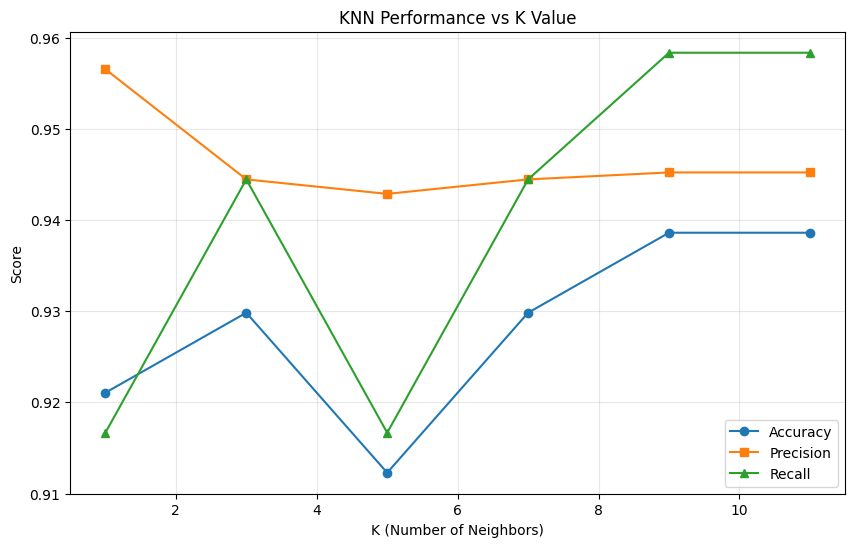

In [ ]:
# Experiment with different K values
print("\n" + "="*50)
print("EXPERIMENTING WITH DIFFERENT K VALUES")
print("="*50)

k_values = [1, 3, 5, 7, 9, 11]
results = []

for k in k_values:
    # Create and train model
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train, y_train)

    # Make predictions
    y_pred_temp = knn_temp.predict(X_test)

    # Calculate accuracy
    acc = accuracy_score(y_test, y_pred_temp)
    prec = precision_score(y_test, y_pred_temp)
    rec = recall_score(y_test, y_pred_temp)

    results.append({
        'K': k,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec
    })

    print(f"K={k:2d}: Accuracy={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}")

# Find best K
results_df = pd.DataFrame(results)
best_k = results_df.loc[results_df['Accuracy'].idxmax(), 'K']
print(f"\nBest K value: {best_k} (Accuracy: {results_df['Accuracy'].max():.4f})")

# Visualize results
plt.figure(figsize=(10, 6))
plt.plot(results_df['K'], results_df['Accuracy'], marker='o', label='Accuracy')
plt.plot(results_df['K'], results_df['Precision'], marker='s', label='Precision')
plt.plot(results_df['K'], results_df['Recall'], marker='^', label='Recall')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Score')
plt.title('KNN Performance vs K Value')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('knn_k_comparison.png', dpi=150, bbox_inches='tight')
print("\nSaved visualization to 'knn_k_comparison.png'")
plt.show()
